# generate 'supermeans' for validation notes

Firstly, clear all variables in the local memory.

In [1]:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

Now import modules etc.

In [47]:
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import datetime
from iris.time import PartialDateTime
import copy
import pickle
import iris.analysis
import netCDF4
from netCDF4 import Dataset
from braceexpand import braceexpand
import os
from pylab import *
import cartopy.crs as ccrs
import iris.analysis.cartography
import re
from os import listdir

The following renders graphics inside the Jupyter document

In [3]:
%matplotlib inline

Increase font size for graphics

In [4]:
matplotlib.rcParams['font.size'] = 24

test the graphics!
example from here... https://matplotlib.org/users/pyplot_tutorial.html

/nesi/nobackup/niwa00013/williamsjh/miniconda2/envs/master/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'xkcd', u'Humor Sans', u'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


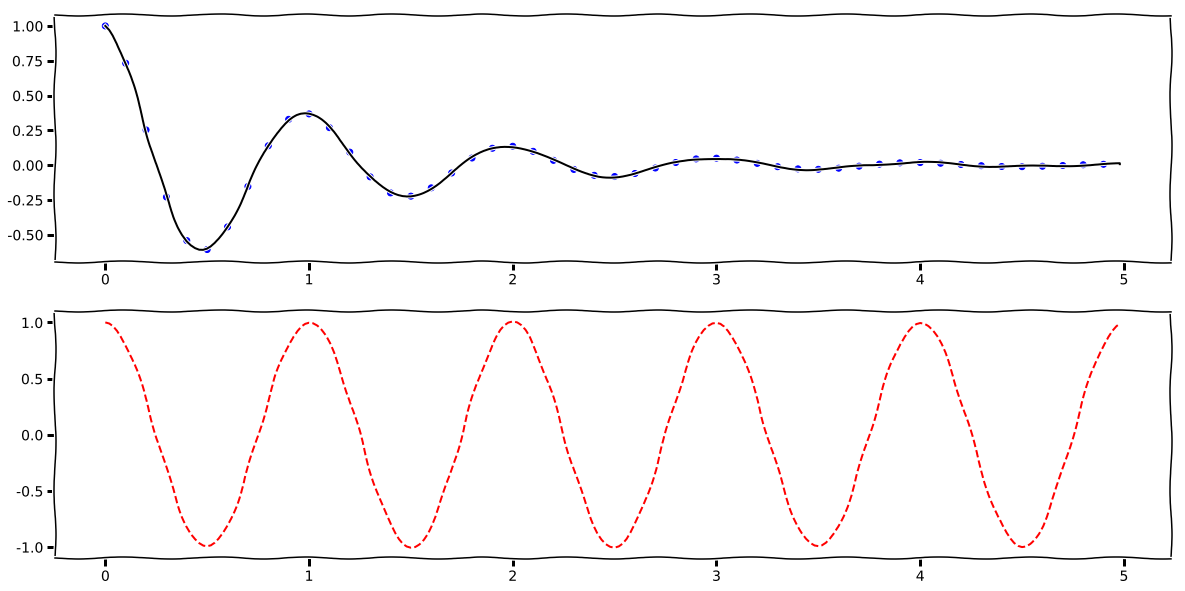

In [5]:
plt.figure(figsize=(20,10))

plt.xkcd()

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


# creating seasonal and annual means

In [7]:
in_dir_base='/home/williamsjh/cylc-run/'
runid='bc048'

whoami='williamsjh'

project='niwa00013'

in_dir=in_dir_base+'u-'+runid+'/share/data/History_Data/'

out_dir=in_dir+'/climate-meaning'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

firstyear=1961

nyears = 20

years=tuple(range(firstyear,firstyear+nyears))

type(years)

#print the years
print years

print out_dir


(1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980)
/home/williamsjh/cylc-run/u-bc048/share/data/History_Data//climate-meaning


In [ ]:
year = 1961

####

#djf
print 'djf'

files = list(braceexpand(out_dir+'/../*pm*{'+str(year - 1)+'dec,'+str(year)+'{jan,feb}}.pp'))

vars = iris.load(files)

foo=copy.copy(vars)

for i in range(len(vars)):
    foo[i] = vars[i].collapsed('time',iris.analysis.MEAN)

pickle = out_dir+'/'+runid+'a.ps'+year+'djf.pkl'    
    
pickle.dump(foo, open(pkl[:2], "wb" ) )    
    
iris.save(foo,out_dir+'/'+runid+'a.ps'+year+'djf.pp')

###########################################################################################################################

#mam
print 'mam'

files = list(braceexpand(out_dir+'/../*pm*'+str(year)+'*{mar,apr,may}.pp'))

vars = iris.load(files)
foo = copy.copy(vars)

for i in range(len(vars)):
    foo[i] = vars[i].collapsed('time',iris.analysis.MEAN)
    
pkl = out_dir+'/'+runid+'a.ps'+year+'mam.pkl'    
    
pickle.dump(foo, open(pkl[:2], "wb" ) )       
    
iris.save(foo,out_dir+'/'+runid+'a.ps'+year+'mam.pp')

###########################################################################################################################

#jja       
print 'jja'

files = list(braceexpand(out_dir+'/../*pm*'+str(year)+'*{jun,jul,aug}.pp'))
                         
vars = iris.load(files)
foo = copy.copy(vars)

for i in range(len(vars)):
    foo[i] = vars[i].collapsed('time',iris.analysis.MEAN)

pkl = out_dir+'/'+runid+'a.ps1'+year+'djf.pkl'    
    
pickle.dump(foo, open(pkl[:2], "wb" ) )      

iris.save(foo,out_dir+'/'+runid+'a.ps'+year+'jja.pp')

###########################################################################################################################

#son          
print 'son'

files = list(braceexpand(out_dir+'/../*pm*'+str(year)+'*{sep,oct,nov}.pp'))
                         
vars = iris.load(files)
foo = copy.copy(vars)

for i in range(len(vars)):
    foo[i] = vars[i].collapsed('time',iris.analysis.MEAN)
    
pkl = out_dir+'/'+runid+'a.ps'+year+'djf.pkl'    
    
pickle.dump(foo, open(pkl[:2], "wb" ) )       
    
iris.save(foo,out_dir+'/'+runid+'a.ps'+year+'son.pp')


djf


# supermeans from already existing seasonal and annual means

load data 

In [1]:
in_dir_base='/home/williamsjh/cylc-run/'
runid='bc048'

whoami='williamsjh'

project='niwa00013'

out_dir='/nesi/nobackup/'+project+'/'+whoami+'/esmeval/user_data/'+whoami+'/model_data/u-'+runid

in_dir=in_dir_base+'u-'+runid+'/share/data/History_Data/'

firstyear=1961

nyears = 2

years=tuple(range(firstyear,firstyear+nyears))

type(years)

#print the years
years

print out_dir


/nesi/nobackup/niwa00013/williamsjh/esmeval/user_data/williamsjh/model_data/u-bc048


In [2]:
len(years)

if len(years) == 2:
    supermeanlabel = '2'


if len(years) == 10:
    supermeanlabel = 'a'
    
if len(years) == 20:
    supermeanlabel = 'k'

if len(years) == 2:
    supermeanlabel = '2'

if len(years) >= 30 and len(years) <40:
    supermeanlabel = 't'

if len(years) >= 50 and len(years) <100:
    supermeanlabel = 'l'


In [3]:
if not os.path.exists(out_dir+'/supermeans-maui'):
    os.makedirs(out_dir+'/supermeans-maui')

ann


NameError: name 'sys' is not defined

In [6]:
for period in ['ann','djf','mam','jja','son']:

    
    print period
    sys.stdout.flush()
    
    if period == 'ann':
        sys.stdout.flush()
        fnames = [in_dir+'/*py*{}*'.format(year) for year in years]
        print fnames
        sys.stdout.flush()
    else:
        fnames = [in_dir+'/*ps*{}*'.format(year)+period+'*' for year in years]
        print fnames
        sys.stdout.flush()

    native = iris.load(fnames)
    nativemean = native 
    
    for i in range(len(native)):
        nativemean[i] = native[i].collapsed('time',iris.analysis.MEAN)
    
    os.chdir(out_dir)

    print out_dir



    iris.save(nativemean,out_dir+'/supermeans-maui'+'/'+runid+'a.m'+supermeanlabel+str(years[-1])+period+'.pp')
    # the m in the previous line is the 'mean' indicator.
    




jja
['/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1989*jja*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1990*jja*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1991*jja*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1992*jja*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1993*jja*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1994*jja*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1995*jja*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1996*jja*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1997*jja*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1998*jja*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1999*jja*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*2000*jja*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*2001*jja*', '/home/

/nesi/nobackup/niwa00013/williamsjh/miniconda2/envs/master/lib/python2.7/site-packages/iris/fileformats/_ff.py:714: UserWarning: The stash code m01s26i001 is on a grid 23 which has not been explicitly handled by the fieldsfile loader. Assuming the data is on a P grid.
  '.'.format(stash, subgrid))
/nesi/nobackup/niwa00013/williamsjh/miniconda2/envs/master/lib/python2.7/site-packages/iris/fileformats/_ff.py:714: UserWarning: The stash code m01s26i002 is on a grid 23 which has not been explicitly handled by the fieldsfile loader. Assuming the data is on a P grid.
  '.'.format(stash, subgrid))
/nesi/nobackup/niwa00013/williamsjh/miniconda2/envs/master/lib/python2.7/site-packages/iris/fileformats/_ff.py:714: UserWarning: The stash code m01s26i003 is on a grid 23 which has not been explicitly handled by the fieldsfile loader. Assuming the data is on a P grid.
  '.'.format(stash, subgrid))
/nesi/nobackup/niwa00013/williamsjh/miniconda2/envs/master/lib/python2.7/site-packages/iris/fileformats

/nesi/nobackup/niwa00013/williamsjh/esmeval/user_data/williamsjh/model_data/u-ai955


/nesi/nobackup/niwa00013/williamsjh/miniconda2/envs/master/lib/python2.7/site-packages/iris/fileformats/pp.py:1250: UserWarning: Downcasting array precision from float64 to float32 for save.If float64 precision is required then please save in a different format
  warnings.warn("Downcasting array precision from float64 to float32"


son
['/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1989*son*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1990*son*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1991*son*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1992*son*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1993*son*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1994*son*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1995*son*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1996*son*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1997*son*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1998*son*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*1999*son*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*2000*son*', '/home/williamsjh/cylc-run/u-ai955/share/data/History_Data//*ps*2001*son*', '/home/

In [22]:
print out_dir

/nesi/nobackup/williamsjh/esmeval/user_data/williamsjh/model_data/u-av818


In [25]:
os.chdir(out_dir)

print out_dir

if not os.path.exists(out_dir+'/supermeans'):
    os.makedirs(out_dir+'/supermeans')

iris.save(nativemean,out_dir+'/supermeans'+'/'+runid+'a.m'+supermeanlabel+str(years[-1])+period+'.pp')

/nesi/nobackup/williamsjh/esmeval/user_data/williamsjh/model_data/u-av818
